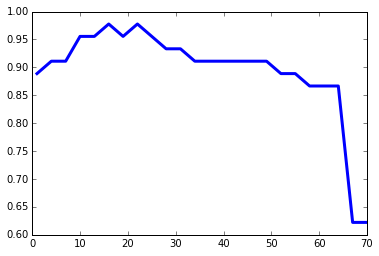

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

iris = datasets.load_iris()
iris_df = pd.DataFrame(scale(iris.data), columns=iris.feature_names)

#1. Implement KNN classification, using the sklearn package.

n_neighbors = range(1, 71, 3)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=29)
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(n_neighbors, scores, linewidth=3.0)


In [44]:
#2. Use the sklearn package to implement cross-validation 
#for your classifier. Use 5 folds for your cross-validation.

from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(10, weights='uniform')
clf.fit(iris.data, iris.target)
clf_scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

print clf_scores

[ 0.96666667  0.96666667  0.96666667  0.93333333  0.96666667]


In [45]:
#3. Use your KNN classifier and cross-validation code from 
#(1) and (2) above to determine the optimal value of K (number 
#of nearest neighbors to consult) for this Iris dataset. 
#Hint: This hyperparameter will be a number between 1 and 150 :)

#I tried values between 9 and 20. Around 10 seems most accurate

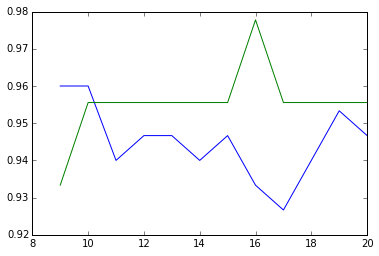

In [46]:
#4. Using matplotlib, plot classifier accuracy versus the 
#hyperparameter K for a range of K that you consider interesting. 
#Explain in words what you are seeing.
clf_scores_list = []
for n in xrange(9,21):
    clf = neighbors.KNeighborsClassifier(n, weights='uniform')
    clf.fit(iris.data, iris.target)
    clf_scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)
    clf_scores_list.append(clf_scores.mean())
    
knn_scores = []
for n in xrange(9,21):
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    knn_scores.append(clf.score(X_test, y_test))

indices = range(9, 21)
plt.plot(indices, clf_scores_list)
plt.plot(indices, knn_scores)

In [47]:
#5. Now, write your own implementation of cross-validation in 
#Python without using the cross-validation methods from sklearn. 
#Cross validation is a very important concept. Compare the 
#results of your cross-validation code with your results using 
#the cross-validation in sklearn.

# Parameters taken in -  n folds, random number?, data set
# Things to keep track of - array of accuracies for each set

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
iris = datasets.load_iris()
import random
import numpy

def cross_validate(data, folds):
    accuracies = [] # this will hold the errors for each fold
    #1 shuffle the data
    random.shuffle(data)
    #2 split it into n parts
    folds = numpy.array_split(data, folds,0)
    #3 loop through the parts, first use 1 as test, 1+ for training, 2 as test, etc.
    for i in folds:
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=29)
        # use i as the test
        # use [:i] unioned with all of  [i+1:]  for training
        #4 compare and test the accuracy for each set
        # put this accuracy in accuracies
    #5 average the accuracies, return accuracies.mean()
    




In [48]:
cross_validate(iris.data, 5)


[array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 5.1,  3.5,  1.4,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5.1,  3.5,  1.4,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.1,  3.5,  1.4,  0.2],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.2],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.1,  3.5,  1.4,  0.2],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5.8,